In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable
from sklearn.metrics import accuracy_score

### 1.  The problem: The probability of passing an exam versus hours of study

A group of 20 students spends between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability of the student passing the exam?

In [17]:
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75],
[1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25],
[4.50], [5.50]])
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

In [18]:
def predictHypothesis(X : List[float], theta : List[float], \
                      bias : List[float])->List[float]:
    """ 
        Compute the dot product of the training set and theta tranposed + bias
        returns the model estimated probability
    """
    return (np.dot(X, theta.T) + bias)

In [19]:
def sigmoid(z: List[float]) ->List[float]:
    """Maps the predicted values to probabilities by converting 
       any real number to a number between 0 and 1"""
    return 1/ (1+np.exp(-z))

In [20]:
def costFunction(yActual : List[float], yPred: List[float]) -> float:
    """Cross entropy function for a single training input """
    return -((yActual * np.log(yPred)) + (1 - yActual) * np.log(1- yPred)).mean()


In [21]:
def gradientDescent(theta: List[float],bias : List[float],\
                    learningRate : float, yPred, yActual) -> List[float] :
    """
        Compute the difference between the predicted and the actual values
        and compute the average of over all training instances for the theta 
        values.
        
    """
    dtheta : List[float]= 1/ len(y) * np.sum(np.dot(X.T , (yPred - yActual)))    
    dbias : List[float] = np.sum(yPred - yActual)
        
    theta = theta - learningRate * dtheta
    bias = bias - learningRate * dbias

    return theta, bias
    

In [22]:
def hasConverged(trainingLoss : List[float], tolerance : float = 1e-05)->Tuple[int,float]:
    """
        Iterate over the maximum number of epochs, if the number of epochs is 
        greater than 2, in every 5 steps, check if the current loss value minus 
        is previous loss value is less than the tolerance  0.00001
        If true, return the number of epochs and the loss value
    """
    epochs : int = 1000
    try:
        for epoch in range(epochs):
            if epoch > 2:
                if epoch % 5 == 0:
                    if np.abs((trainingLoss[epoch] - trainingLoss[epoch - 1])) <= tolerance:       
                        return epoch,trainingLoss[epoch]
    except IndexError:
        pass
    

In [23]:
def fit(X : List[float], y :  List[float], \
        learningRate : float)->Tuple[float,float]:
    """
        Takes the training output and labels and the learning rate
        Initializes the theta values and the loss history
        Until the algorithm has not converged: 
        Update the values of the predictions, the losses
        and the theta and bias values 
        Once it has converged, return the final prediction,
        training loss, theta and bias
    
    """

    theta, bias = initializeThetaValues()
    loss = []

    while not hasConverged(loss):
        yPred = sigmoid(predictHypothesis(X, theta, bias))
        loss.append(costFunction(y, yPred))
        theta, bias= gradientDescent(theta, bias, learningRate, yPred, y)
    
    epoch, lowestTrainingLoss = hasConverged(loss)
    return yPred, loss, epoch, lowestTrainingLoss
     

def initializeThetaValues()->List[float]:
    """Initialize the theta values"""
    theta : Tuple[float, float] = np.zeros((X.shape[1])), np.zeros((X.shape[1]))
    return theta


In [24]:
yPred, loss, epoch, lowestTrainingLoss = fit(X,y, 0.3)

### Accuracy

In [25]:
def decisionBoundary(yPred: List[float]) -> List[int]:
    """return 1 if the prediction is >=0.5, otherwise return 0"""
    return [1 if pred >=0.5 else 0 for pred in yPred ]


In [26]:
pred = decisionBoundary(yPred)
print('Accuracy:', accuracy_score(y, pred) * 100,'%')

Accuracy: 80.0 %


## Tasks 

#### [writeup] In a markdown box, write a short report (no more than 400 words) that describes the workings of your code.

<b>predictHypothesis</b>: Computes the dot product and gives the algorithm prediction: 

$$ z =  h_{\theta}(x) \ {=} \ \theta^Tx \ {+ \ b} \$$

<br><br>
<b>Sigmoid function</b> also knoww as <b>squashing fuction</b>  Takes the algorithm's prediction computed by the predictHypothesis and maps it to a y value between 0 and 1, using the function:   

$$ h_{\theta}(x) {= g(z) =} \frac{1}{1+e^{-z}}$$

<br><br>
<b>Cost function</b>
The objective of the cost function is see how well the model is performing given a set of theta parameters. For logistic regression the cost function is defined as: 

$$\text{Cost}(h_{\theta}(x), y) = \{ \begin{array}{1 1} -\log(h_{\theta}(x)) & \quad \text{if $y = 1$}\\ -\log(1 - h_{\theta}(x)) & \quad \text{if $y = 0$}\\ \end{array} $$

<br><br>
<b>GradientDescent</b>The goal of  gradient descent is to find the global minimum of the problem. The algorithm updates the theta parameters in order to minimize the cost.  

$$ J(\theta)  = \frac{1}{m} \sum\limits_{i=1}^{m}({\sigma}({\theta^Tx^{(i)} - y^{(i)})x_j^{(i)}}  $$
 
<br><br>
<b>hasConverged</b>:Algorithm designed to stop the iterations (epochs) once the difference in the  loss values has become insignificant. After the second iteration (to avoid an index error) the algorithm will check in every 5 iterations if the difference between the current and the previous iteration is less then 0.00001. If so, the algorithm returns the number of iterations and the current loss value

<br><br> 
 <b>Fit</b>:
Fit is the main function used to train the data. It takes the necessary parameters: (training set, true labels, learning rate) and while the algorithm has not converged, it updates the predictions, the theta values,  and the loss
 
<br><br>
<b>decisionBoundary</b>:
Logistic Regression Model Prediction: 
Outputs a list with the predicted outputs based on the decision boundary below
$$\hat{y} =
\left\{
    \begin{array}{ll}
        {0}  & \mbox{if}\ \hat{p} < 0.5 \\
        {1} & \mbox{if}\ \hat{p}  \geq 0.5
    \end{array}
\right.$$

<br><br>
<b>plotLoss</b>: 
The original goal of this function was to plot the training loss with the first learning rate that I used (0.01). The algorithm took 920 iterations to converge with a loss of 0.4989. Through some experiments, I have come to the conclusion that the best learning rate is 0.3, taking only 65 iterations to converge and with a loss of 0.4963
<br><br>
<b>aTooLarge</b>:
Works in a similar way as the plotLoss function, however the learning rates are high. The number of iterations is set to a maximum of 30, otherwise the plot becomes too cluttered  

## Questions

#### 1. After how many iterations, and for which learning rate (α) did your algorithm converge? Plot the loss function with respect to iterations to illustrate this point. 

With the learning rate is 0.3, the algorithm took 65 steps to converged with a loss of 0.4963904154905137. With the learning rate at 0.4, the algorithm took only 35 steps to converge but the learning loss did spike in the first few iterations, followed by a sharp decrease.

numEpochs: 155  loss 0.49660343308124205
numEpochs: 90  loss 0.49643904052090376
numEpochs: 65  loss 0.4963904154905137
numEpochs: 35  loss 0.496360689525305


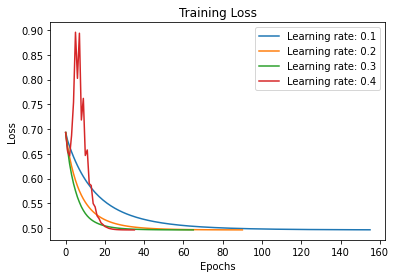

In [27]:
def plotLoss(loss : List[float], _lrate: List[float], func: Callable = None ):
    """
        Takes the output of the loss function, a list of learning rates and a function.
        Fit the training data according to the function
        Plot the results
    """
    for lr in _lrate:
        
        try:
            if func == fit:
                yPred, loss, epoch, lowestTrainingLoss = func(X,y, lr)
                print('numEpochs: {epochs}  loss {minValue}'.format(epochs=epoch, minValue=lowestTrainingLoss))    
            if func == aTooLarge:
                loss = func(X,y, lr)
                print('Learning rate {lr}     maximum loss {loss}' 
                      .format(lr=lr, loss=max(loss)))
        except NameError:
            pass
        
        plt.ylabel('Loss')
        plt.xlabel('Epochs')
        plt.title('Training Loss')

        plt.plot(loss, label = "Learning rate: "+ str(lr))
        plt.legend();

            

lr = [0.1, 0.2, 0.3, 0.4]
plotLoss(loss, lr, fit)

Best learning rate is 0.3: numEpochs: 65 loss 0.4963904154905137


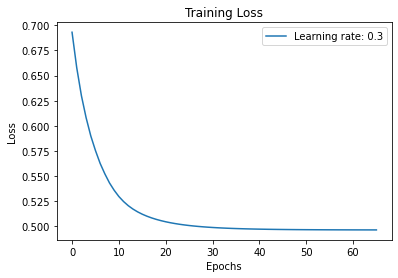

In [28]:
print('Best learning rate is {lr}: numEpochs: {epochs} loss {minValue}'.\
      format(epochs=epoch, minValue=lowestTrainingLoss, lr=0.3))

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training Loss')

plt.plot(loss, label = "Learning rate: " + str(0.3))
plt.legend();

#### 2. What happens if α is too large? How does this affect the loss function? Plot the loss function with respect to iterations to illustrate this point.

As the plot shows, when setting a large learning rate, the learning loss is high, and the model never converges.

In [29]:
def aTooLarge(X : List[float], y :  List[float], learningRate : float):
    theta, bias = initializeThetaValues()
    loss = []
    
    for epoch in range(25):
        yPred = sigmoid(predictHypothesis(X, theta, bias))
        loss.append(costFunction(y, yPred))
        theta, bias = gradientDescent(theta, bias, learningRate, yPred, y)
    
    return loss


Learning rate 1.0     maximum loss 4.1686339043514975
Learning rate 1.4     maximum loss 5.919109926650288
Learning rate 1.7     maximum loss 6.64543879739646
Learning rate 2.0     maximum loss 8.558051069192986


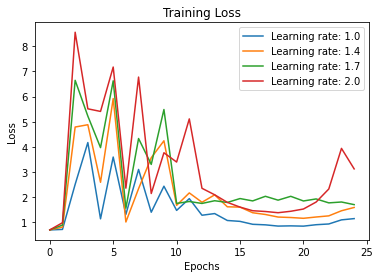

In [30]:
lrLarge = [1.0, 1.4, 1.7, 2.0]
plotLoss(loss, lrLarge, aTooLarge)

#### 3. Assume that you are applying logistic regression to the iris (flower) dataset, as in the previous assignment. Answer the following questions:

##### a) How would your hypothesis function change in this case and why?

In binary classification, the hypothesis is defined as ${z =}  h_{\theta}(x) = {\theta^Tx} $. 
That is then applied to the logistic model using the function $ h_{\theta}(x) {= g(z) =} \frac{1}{1+e^{-z}} $ so that there are only two possible outputs : 
${y} \in {\{0, 1}\} $


However, a single hypothesis line is insufficient to separate more than two classes. Given a multiclass classification problem, a technique must be used to accommodate $ {C} $ number of classes such that $ {c \in \{0, 1, 2, …, C - 1}\}$. One common approach is known as the one-vs-rest.  The idea is similar to the binary classification problem:  computes the probability of each class, though now each class with its own theta parameters 
 
$$ h^{c}_{\theta}{(x) = } \  \theta^T_{c} x  $$

To predict that a class $ {c \in \{0, 1, 2, …, C - 1}\}$,  choose the class with the highest estimated probability

$$ \hat{y} = \textrm{argmax}_{c} =  h^{c}_{\theta}{(x) = } \  \theta^T_{c} x  $$ 



 



 ##### (b) How would you utilize your implementation of logistic regression in order to perform (multi-class) classification on the iris dataset? Include some pseudocode while discussing your approach.

Using the one-versus-all method, iterate over the list of  the labels so that each class has its unique label $ y = {\{0,1,2}\}$. Theta values must be initialized to the shape of the training set, which has four features. If the current label matches the unique set of labels, that means it belongs to that class, otherwise it does not. 
<br><br>
Get the doc product of the training set and the theta transposed. Use thesigmoid function to squash the value between 0 and 1.
Get the error and append it so that the gradient descent updates the theta parameters. To predict a class, return the highest prediction
<br><br>
predictions = []<br>
loss = []<br>
<br>
For each label in set(y):<br>
&emsp;&emsp;&emsp;&emsp; If current label == class(y):<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;		y_copy = Set Class to 1<br>
&emsp;&emsp;&emsp;&emsp;	else:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;		y_copy = Set class to 0<br>			

&emsp;&emsp;&emsp;&emsp; While has not converged(loss):<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;			yPred = sigmoid(get_dot_Product.(X, theta.T)))	
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;	error =  y_copy - yPred<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;	loss.append(error)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;	theta, bias = gradientDescent(theta, bias, learningRate, yPred, y) <br>
		
&emsp;&emsp;&emsp;&emsp; predictions.append(yPred)

return max(predictions)


## Bibliography



General Guidance: Lecture Slides

Question 3 a):
GeÌron, Aureìlien. 2019. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2nd ed. CA 95472: O’Reilly.
pages 143 - 151

Inspiration for question 3 b)
https://kenzotakahashi.github.io/logistic-regression-from-scratch-in-python.html